# 🚴‍♂️ Bike Sales Analysis
Exploring Sales Across Countries and States

**📌 1. Importing Necessary Libraries
We start by importing essential libraries for data analysis, visualization, and modeling.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**📂 2. Loading the Dataset
We'll load the dataset and inspect its first few rows.

In [278]:
data=("C:\\Users\HP\\Desktop\\BIKE SALES ANALYSIS.xlsx")
df= pd.read_excel(data)
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [291]:
def CateAge(age):
    if age < 25:
        return "Youth (<25)"
    elif age >25 and age <35:
        return "Youth Adults (25-34)"
    elif age >35 and age <65:
        return "Adults (35-64)"
    else :
        return "Senior (65+)"
df["Age_group"]=df["Customer_Age"].map(CateAge)

In [292]:
df.drop("Age_Group",axis=1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Age_group
0,2013-11-26,26,November,2013,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth (<25)
1,2015-11-26,26,November,2015,19,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Youth (<25)
2,2014-03-23,23,March,2014,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Adults (35-64)
3,2016-03-23,23,March,2016,49,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Adults (35-64)
4,2014-05-15,15,May,2014,47,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Adults (35-64)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,2016-04-12,12,April,2016,41,M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,Adults (35-64)
112032,2014-04-02,2,April,2014,18,M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,Youth (<25)
112033,2016-04-02,2,April,2016,18,M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,Youth (<25)
112034,2014-03-04,4,March,2014,37,F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,Adults (35-64)


**🔍 3. Data Cleaning and Preprocessing
Before analysis, we check for missing values and duplicates.

In [207]:
print(f"Missing values:{df.isnull().sum().value_counts()}")
print(f"Duplicated Values:{df.duplicated().sum()}")

Missing values:0    19
Name: count, dtype: int64
Duplicated Values:0


**📊 4. Total Sales by Country

Here, we visualize total sales across different countries.

In [8]:
sbc= df.groupby("Country")["Revenue"].sum().reset_index(name="Revenue")
sbc.sort_values(by="Revenue",inplace=True,ascending=False)
sbc.reset_index(drop=True,inplace=True)
sbc.head()

,Country,Revenue
0,United States,27777098
1,Australia,21196395
2,United Kingdom,10575628
3,Germany,8956724
4,France,8414745


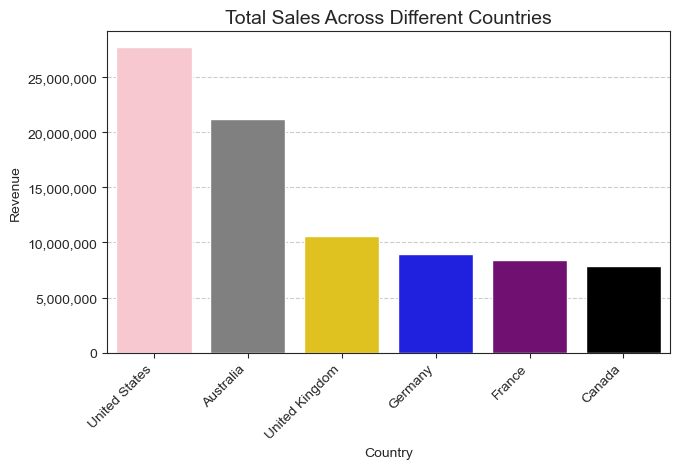

In [215]:
#Totale Sales by Countries
ax=sns.barplot(y="Revenue",x="Country",data=sbc,palette=["pink","gray","gold","blue","purple","black"],hue="Country")
plt.title("Total Sales Across Different Countries",fontsize=14)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
plt.grid(axis="y",linestyle="--")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

**📌 Insight:
.  The country with the highest sales is United States, while Canada has the lowest.

. Further analysis can explore sales distribution within each country.



**📍 5. Sales Distribution by State (USA, Canada, UK and Others)

Now, we analyze sales at the state level for each major country.

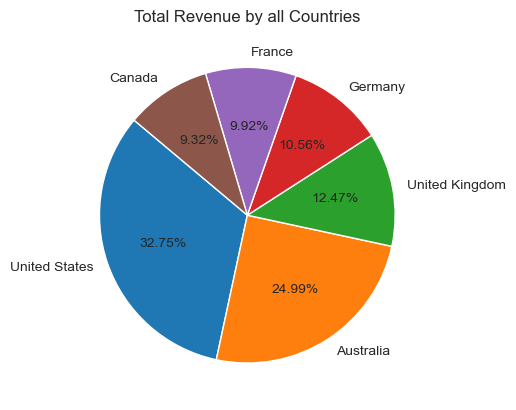

In [37]:
plt.pie(sbc["Revenue"],labels= sbc["Country"],autopct="%1.2f%%",startangle=140)
plt.title("Total Revenue by all Countries")
plt.show()

In [218]:
usa_rev= df[df["Country"]=="United States"]
canada_rev= df[df["Country"]=="Canada"]
uk_rev= df[df["Country"]=="United Kingdom"]
aus_rev=df[df["Country"]=="Australia"]
germ_rev=df[df["Country"]=="Germany"]
france_rev= df[df["Country"]=="France"]

In [219]:
usa_Rev= usa_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
usa_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
usa_Rev.reset_index(drop=True,inplace=True)
usa_Rev.head(22)



,State,Revenue
0,California,17529787
1,Washington,6701258
2,Oregon,3435046
3,Wyoming,21973
4,Illinois,20141
5,Florida,11014
6,Ohio,9747
7,Arizona,9379
8,Texas,6835
9,New York,5257


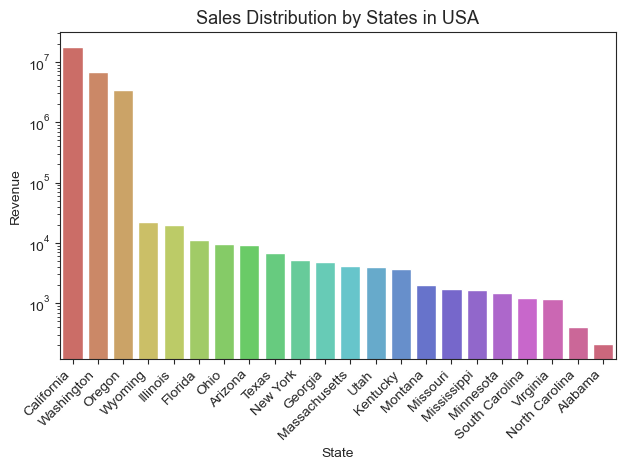

In [230]:
num_bars=22
palette=sns.color_palette("hls",num_bars)
sns.barplot(y="Revenue",x="State",data=usa_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in USA",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
plt.yscale("log")
plt.show()

**📌 Insight:
The highest revenue-generating state in the USA is California.

This could be due to higher population density or a higher number of bike stores.



In [222]:
#For CANADA

canada_Rev= canada_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
canada_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
canada_Rev.reset_index(drop=True,inplace=True)
canada_Rev.head(10)


,State,Revenue
0,British Columbia,7848334
1,Alberta,56803
2,Ontario,1045


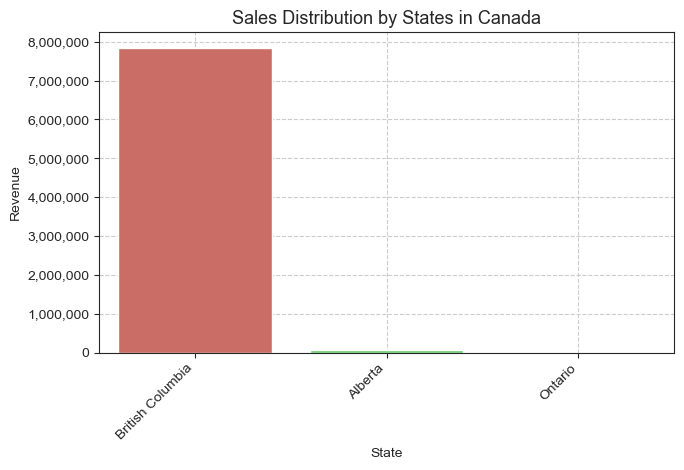

In [231]:
num_bars=3
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=canada_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Canada",fontsize=13)
plt.xticks(rotation=45,ha="right")
plt.grid(linestyle="--")
sns.set_style("ticks")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight:
The highest revenue-generating state in the Canada is British Columbia.

This could be due to higher population density or a higher number of bike stores aswell .

In [226]:
#Fo UK
uk_Rev= uk_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
uk_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
uk_Rev.reset_index(drop=True,inplace=True)
uk_Rev.head(10)



,State,Revenue
0,England,10575628


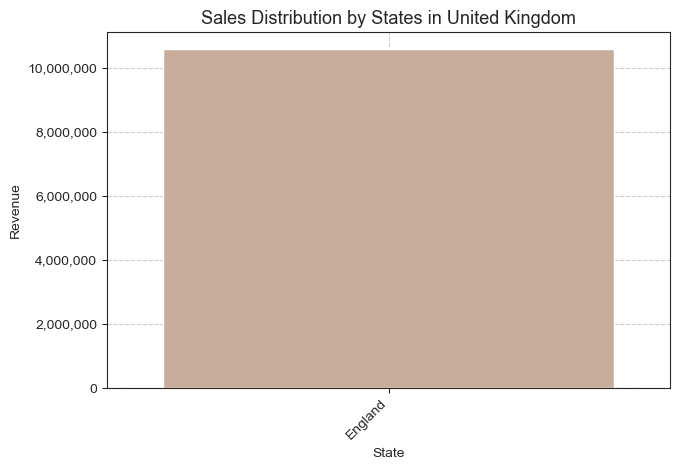

In [232]:
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=uk_Rev,palette="pink",hue="State")
plt.title("Sales Distribution by States in United Kingdom",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.grid(linestyle="--")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight:
England accounts for 100% of sales in the UK since it's the only listed state.

In [235]:
#For Australia
aus_Rev= aus_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
aus_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
aus_Rev.reset_index(drop=True,inplace=True)
aus_Rev.head(10)



,State,Revenue
0,New South Wales,9125980
1,Queensland,5055843
2,Victoria,5038294
3,South Australia,1396139
4,Tasmania,580139


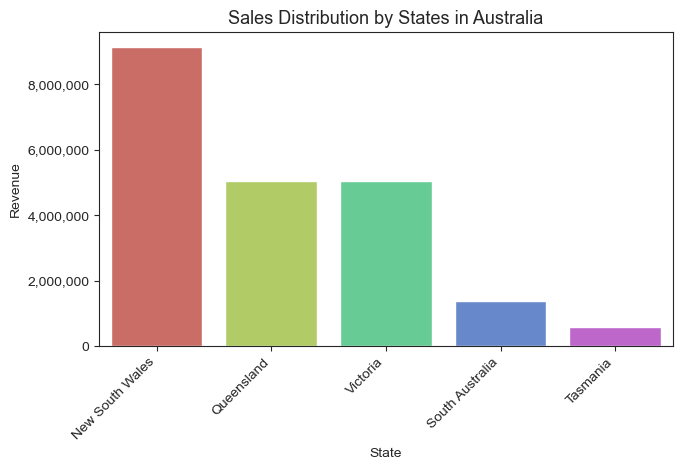

In [236]:
num_bars=5
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=aus_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Australia",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight:
The highest revenue-generating state in the Australia is New South Wales.


In [237]:
#For Germany
germ_Rev= germ_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
germ_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
germ_Rev.reset_index(drop=True,inplace=True)
germ_Rev.head(10)



,State,Revenue
0,Hessen,2067980
1,Saarland,2026497
2,Nordrhein-Westfalen,1803855
3,Hamburg,1550469
4,Bayern,1338181
5,Brandenburg,169742


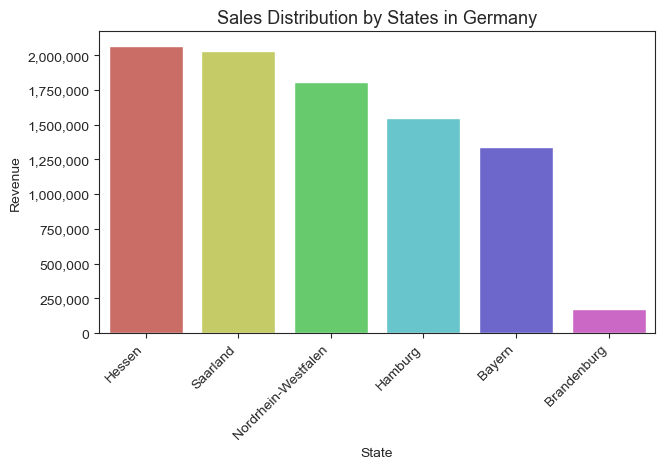

In [241]:
num_bars=6
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=germ_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in Germany",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
#plt.yscale("log")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight:
HESSEN generates the highest revenue in Germany.
SAARLAND ranks second in sales while the gap between Saarland and Hessen is very close.
BRANDENBURG has the lowest revenue, which may indicate lower demand or fewer bike stores.



In [239]:
#For France
france_Rev= france_rev.groupby(["State"])["Revenue"].sum().reset_index(name="Revenue")
france_Rev.sort_values(by="Revenue",inplace=True,ascending=False)
france_Rev.reset_index(drop=True,inplace=True)
france_Rev.head(20)



,State,Revenue
0,Seine (Paris),1642370
1,Nord,1319127
2,Seine Saint Denis,1126738
3,Essonne,972701
4,Hauts de Seine,935836
5,Yveline,688924
6,Seine et Marne,372243
7,Loiret,325081
8,Moselle,266124
9,Garonne (Haute),183412


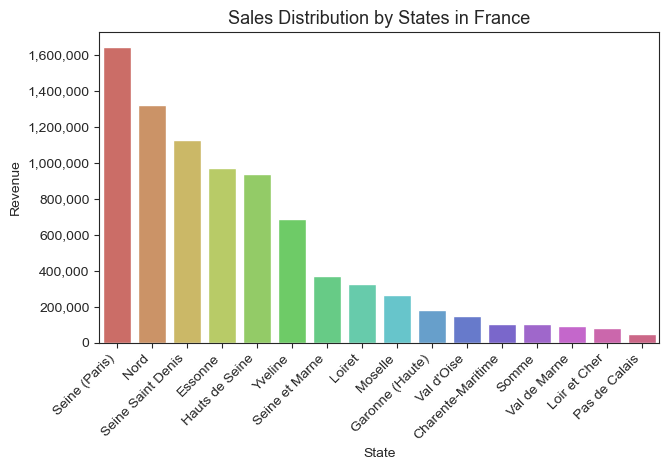

In [242]:
num_bars=16
palette=sns.color_palette("hls",num_bars)
ax=sns.barplot(y="Revenue",x="State",data=france_Rev,palette=palette,hue="State")
plt.title("Sales Distribution by States in France",fontsize=13)
plt.xticks(rotation=45,ha="right")
sns.set_style("ticks")
plt.tight_layout()
#plt.yscale("log")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight (If Multiple States Exist):
SEINE generates the highest revenue.
PAS DE CALAIS has the lowest revenue.

The reason for sales differences could be regional demand, population density, or store locations.



**🏷 6. Revenue Distribution by Gender
Let's see how sales differ between male and female customers.

In [244]:
totalRevByGender=df.groupby("Customer_Gender")["Revenue"].sum().reset_index()
totalRevByGender.sort_values(by="Customer_Gender",ascending=False)
totalRevByGender.reset_index(inplace=True,drop=True)
totalRevByGender.head()

,Customer_Gender,Revenue
0,F,41694689
1,M,43132083


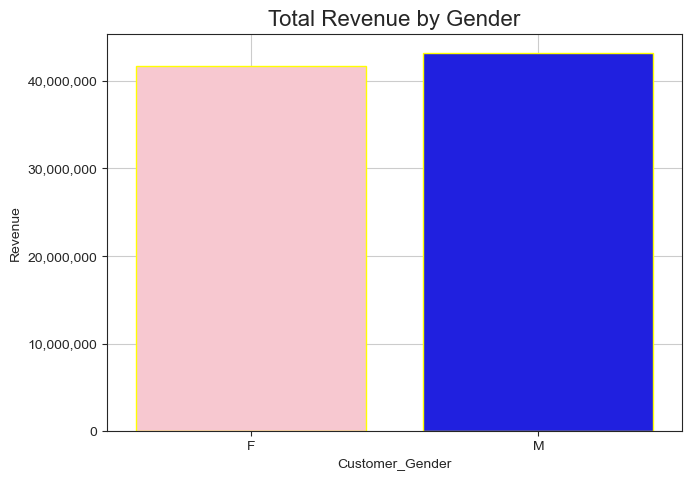

In [246]:
plot=sns.barplot(data=totalRevByGender,x="Customer_Gender",y="Revenue",palette=["pink","Blue"],hue="Customer_Gender",estimator=sum,edgecolor="yellow")
plt.tight_layout()
plt.title("Total Revenue by Gender",fontsize=16)
sns.set_style("ticks")
plt.grid()
plot.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


**📌 Insight:
Sales distribution for Male Clients appears slightly higher than Female customers.

Although Further investigation could explore product preferences by gender.



In [252]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Prediction
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,590.00
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,590.00
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1369.97
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1082.14
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,238.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,112.00
112032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,655.19
112033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,655.19
112034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,685.99


**📌 7. Revenue by Gender Across All Countries

To analyze sales by gender in each country, we use a grouped bar chart:

In [247]:
revByGender =df.groupby(["Customer_Gender","Country"])["Revenue"].sum().reset_index()
revByGender.sort_values(by="Revenue",ascending=False)
revByGender.reset_index(drop=True,inplace=False)

,Customer_Gender,Country,Revenue
0,F,Australia,10793938
1,F,Canada,3649643
2,F,France,4004075
3,F,Germany,4709921
4,F,United Kingdom,5257108
5,F,United States,13280004
6,M,Australia,10402457
7,M,Canada,4256539
8,M,France,4410670
9,M,Germany,4246803


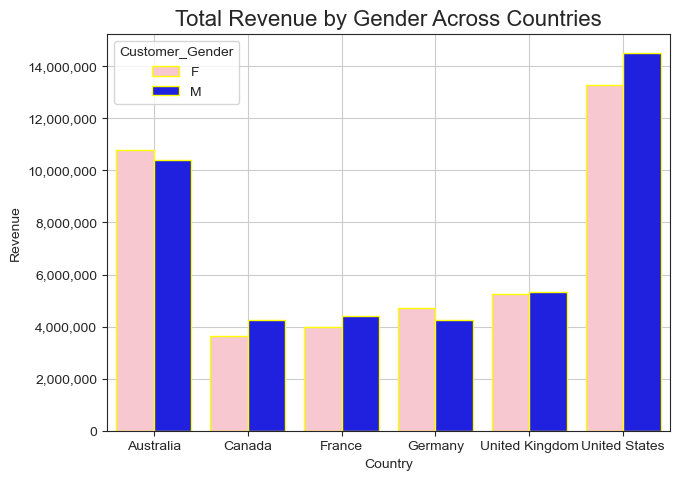

In [248]:
ax=sns.barplot(data=revByGender,x="Country",y="Revenue",palette=["pink","blue"],hue="Customer_Gender",estimator=sum,edgecolor="yellow")
plt.tight_layout()
plt.title("Total Revenue by Gender Across Countries",fontsize=16)
sns.set_style("ticks")
plt.grid()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

**📌 Insight:

**In most countries, male customers generate higher revenue than females.

**However, in Australia,Germany and United kingdom, female customers outperform males in spending.

This insight could help target marketing strategies based on gender preferences.

**📌8. Total Revenue by Age Group
Instead of analyzing individual ages, we group customers into age brackets ( 18-24, 25-34, etc.).

In [305]:
RevByAgeG=df.groupby("Age_group")["Revenue"].sum().reset_index()
RevByAgeG.sort_values(by="Revenue",ascending=False)
RevByAgeG.reset_index(drop=True,inplace=False)

,Age_group,Revenue
0,Adults (35-64),39138249
1,Senior (65+),6045424
2,Youth (<25),11685489
3,Youth Adults (25-34),27957610


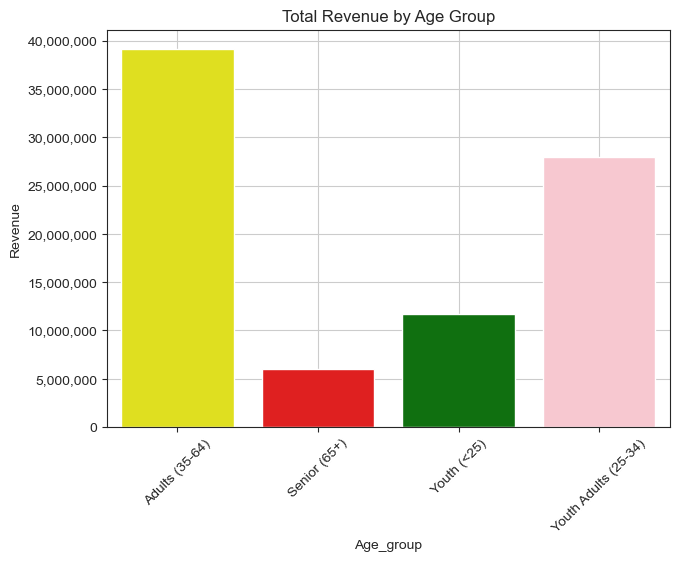

In [306]:
ax=sns.barplot(x="Age_group",y="Revenue",data=RevByAgeG,palette=["yellow","red","green","pink"],estimator=sum,hue="Age_group")
plt.tight_layout()
plt.title("Total Revenue by Age Group")
plt.xticks(rotation=45)
plt.grid()

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌Insight: Revenue by Age Group
    
 The 35-64 age group generates the highest revenue, indicating that middle-aged individuals are the biggest buyers.
 
 The 25-34 age group (Young Adults) follows closely behind in revenue contribution.
 
 Customers aged below 25 contribute moderate revenue, ranking third.
 
 The 65+ age group (Seniors) generates the lowest revenue, suggesting a declining interest in biking or premium products among older customers.

**Key Takeaway:

 Marketing strategies should prioritize customers aged 35-64 and Young Adults (25-34) as they drive the most sales.
 
 Then Consider offering special promotions or budget-friendly options for the 65+ group to encourage more engagement.



**📌 9. Revenue by Age Group Across Countries

Instead of analyzing individual ages, i group customers into age brackets (<25, 25-34, 35-64, 65+).

In [301]:
totalRevByAgeG=df.groupby(["Age_group","Country"])["Revenue"].sum().reset_index()
totalRevByAgeG.sort_values(by="Revenue",ascending=False)
totalRevByAgeG.reset_index(drop=True,inplace=False)

,Age_group,Country,Revenue
0,Adults (35-64),Australia,8307516
1,Adults (35-64),Canada,4142299
2,Adults (35-64),France,3238522
3,Adults (35-64),Germany,3894477
4,Adults (35-64),United Kingdom,4862557
5,Adults (35-64),United States,14692878
6,Senior (65+),Australia,1700977
7,Senior (65+),Canada,610270
8,Senior (65+),France,661052
9,Senior (65+),Germany,661346


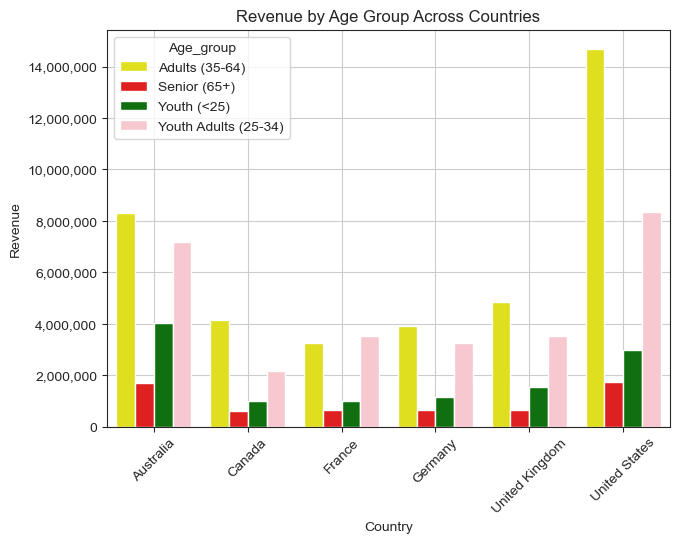

In [304]:
ax=sns.barplot(x="Country",y="Revenue",data=totalRevByAgeG,palette=["yellow","red","green","pink"],estimator=sum,hue="Age_group")
plt.tight_layout()
plt.title("Revenue by Age Group Across Countries")
plt.xticks(rotation=45)
plt.grid()

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**📌 Insight:

1. In Australia , Canada,Germany,United Kingdom and United states, Adult customers (35-64 years old) spend the most.

2. While in France Young Adults (25-34 Years old ) Contribute more revenue


**Understanding age-based spending habits can improve regional marketing strategies.



**Insight 10. Sales Distribution by Product Category

Let's see which product category sells the most

In [43]:
revByProduct=df.groupby("Product_Category")["Revenue"].sum().reset_index()
revByProduct.sort_values(by="Revenue",inplace=True,ascending=False)
revByProduct.reset_index(drop=True,inplace=True)
revByProduct.head()

,Product_Category,Revenue
0,Bikes,61434484
1,Accessories,15022766
2,Clothing,8369522


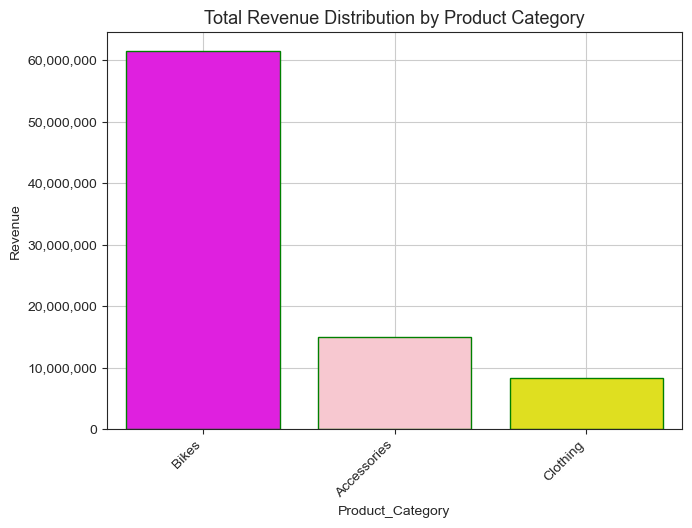

In [44]:
ax=sns.barplot(data=revByProduct,x="Product_Category",y="Revenue",palette=["Magenta","pink","yellow"],hue="Product_Category",edgecolor="green")
plt.tight_layout()
plt.title("Total Revenue Distribution by Product Category",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**Insight: Sales Distribution by Product Category

1. Bikes generate more than 70% of total Revenue, making them the dominant revenue driver.
2. Accessories follow, but there is a significant gap between them and bikes.
3. Clothing ranks the lowest, contributing the least to overall sales.

**Suggestion:
1. The company should prioritize bike sales strategies since they drive the majority of revenue.
2. Accessory sales can be boosted through bundle deals with bikes to increase their contribution.
3. Clothing needs better promotion, possibly through discounts, sponsorships, or targeted advertising.

In [27]:
revByProductByC=df.groupby(["Country","Product_Category"])["Revenue"].sum().reset_index()
revByProductByC.sort_values(by="Revenue",inplace=True,ascending=False)
revByProductByC.reset_index(drop=True,inplace=True)
revByProductByC.head(17)

,Country,Product_Category,Revenue
0,United States,Bikes,19409954
1,Australia,Bikes,16867194
2,United Kingdom,Bikes,7796471
3,Germany,Bikes,6781256
4,France,Bikes,6316991
5,United States,Accessories,5251088
6,Canada,Bikes,4262618
7,United States,Clothing,3116056
8,Australia,Accessories,2727399
9,Canada,Accessories,2265769


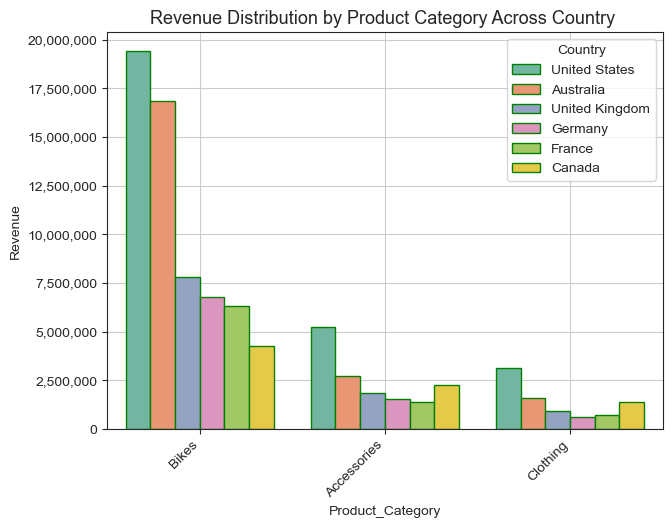

In [30]:
num_bars=6
palette=sns.color_palette("Set2",num_bars)
ax=sns.barplot(data=revByProductByC,x="Product_Category",y="Revenue",palette=palette,hue="Country",edgecolor="green")
plt.tight_layout()
plt.title("Revenue Distribution by Product Category Across Country ",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

In [33]:
revBysubProductByC=df.groupby(["Sub_Category","Country"])["Revenue"].sum().reset_index()
revBysubProductByC.sort_values(by="Revenue",inplace=True,ascending=False)
revBysubProductByC.reset_index(drop=True,inplace=True)
revBysubProductByC.head(17)

,Sub_Category,Country,Revenue
0,Road Bikes,Australia,10028843
1,Road Bikes,United States,9932721
2,Mountain Bikes,United States,7172345
3,Mountain Bikes,Australia,5395897
4,Road Bikes,United Kingdom,3697853
5,Road Bikes,Germany,3534513
6,Road Bikes,France,3457247
7,Mountain Bikes,United Kingdom,2773723
8,Road Bikes,Canada,2499531
9,Mountain Bikes,Germany,2328238


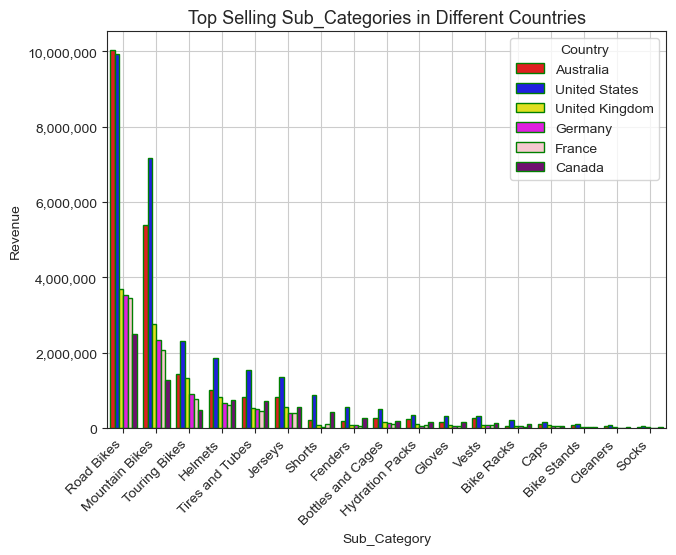

<Figure size 800x600 with 0 Axes>

In [41]:
num_bars=6
ax=sns.barplot(data=revBysubProductByC,x="Sub_Category",y="Revenue",palette=["Red","Blue","Yellow","Magenta","Pink","Purple"],hue="Country",edgecolor="green")
plt.tight_layout()
plt.title("Top Selling Sub_Categories in Different Countries",fontsize=13)
sns.set_style("ticks")
plt.grid()
plt.xticks(rotation=45,ha="right")
plt.figure(figsize=(8,6))

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

**Total Number of Products Sold Per Country

I analyze how many products were sold in each country:

In [69]:
noOfEachProductbySales= df.groupby("Product_Category")["Revenue"].value_counts().reset_index()
noOfEachProductbySales.sort_values(by="Revenue",ascending=False)
noOfEachProductbySales.head()

,Product_Category,Revenue,count
0,Accessories,20,759
1,Accessories,10,748
2,Accessories,35,742
3,Accessories,5,737
4,Accessories,34,728


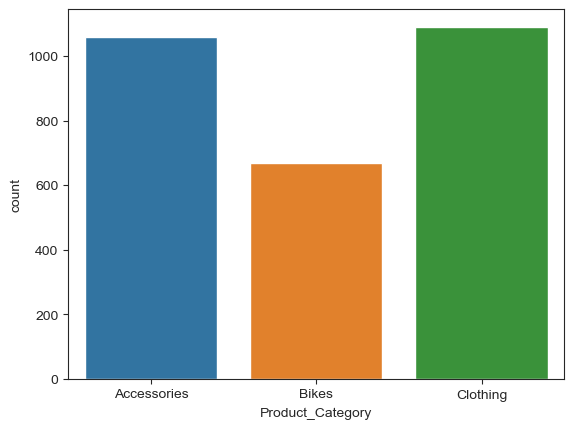

In [73]:
sns.countplot(data=noOfEachProductbySales,x="Product_Category",hue="Product_Category")
plt.show()

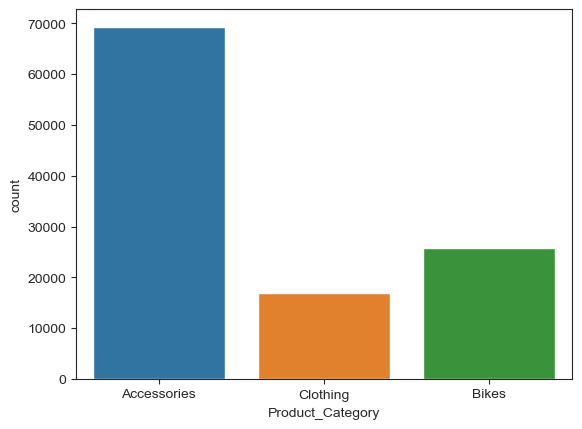

In [71]:
sns.countplot(data=df,x="Product_Category",hue="Product_Category")
plt.show()

In [95]:
noOfEachProductbySales= df.groupby(["Product_Category","Country"])["Revenue"].value_counts().reset_index()
noOfEachProductbySales.sort_values(by="Revenue",ascending=False)
noOfEachProductbySales.head()

,Product_Category,Country,Revenue,count
0,Accessories,Australia,30,220
1,Accessories,Australia,17,195
2,Accessories,Australia,35,180
3,Accessories,Australia,44,178
4,Accessories,Australia,13,154


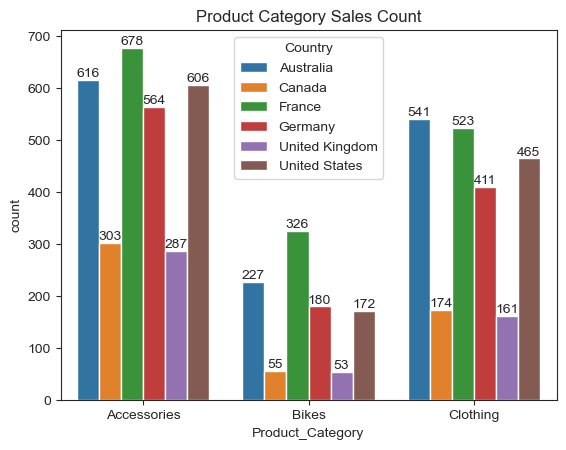

In [93]:
bar=sns.countplot(data=noOfEachProductbySales,x="Product_Category",hue="Country")
plt.title("Product Category Sales Count")
for ba in bar.containers:
    bar.bar_label(ba)
plt.show()

In [96]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [120]:
profitByYear=df.groupby("Year")["Profit"].sum().reset_index()
profitByYear.sort_values(by="Profit",ascending=False)
profitByYear.reset_index(inplace=True,drop=True)
profitByYear.head(6)

,Year,Profit
0,2011,2877185
1,2012,2938519
2,2013,5912432
3,2014,5818522
4,2015,7497361
5,2016,7002220


Text(0.5, 1.0, 'Yearly Profit Percentage Overview')

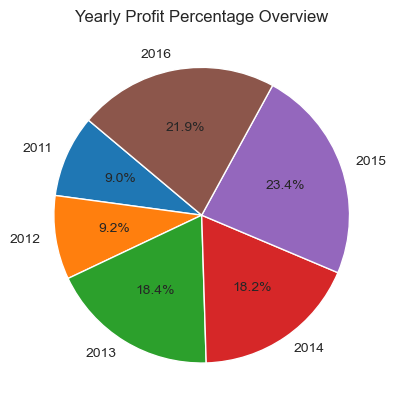

In [121]:
plt.pie(profitByYear["Profit"],labels=profitByYear["Year"],autopct="%1.1f%%",startangle=140)
plt.title("Yearly Profit Percentage Overview")

In [137]:
salesByYear=df.groupby(["Year","Country"])["Profit"].sum().reset_index()
salesByYear.sort_values(by="Profit",ascending=False)
salesByYear.reset_index(inplace=True,drop=True)
salesByYear.head(6)

,Year,Country,Profit
0,2011,Australia,710091
1,2011,Canada,302594
2,2011,France,277373
3,2011,Germany,270488
4,2011,United Kingdom,303817
5,2011,United States,1012822


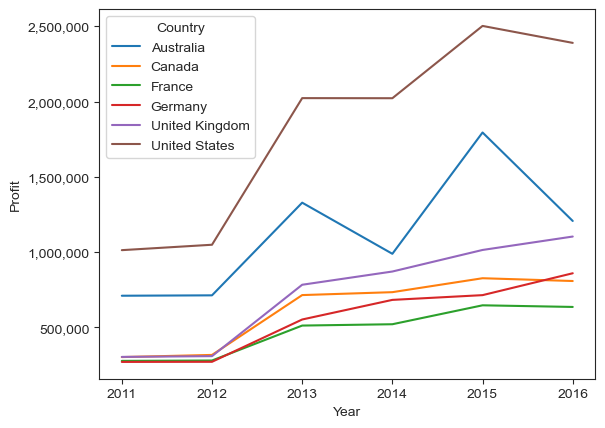

In [139]:
ax=sns.lineplot(data=salesByYear,x="Year",y="Profit",hue="Country")
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


In [6]:
b=df.groupby(["Country"])[["Revenue","Profit"]].sum().reset_index()
b.sort_values(by="Profit",ascending=False)
b.reset_index(inplace=True,drop=True)
b.head(7)

,Country,Revenue,Profit
0,Australia,21196395,6740522
1,Canada,7906182,3702019
2,France,8414745,2872082
3,Germany,8956724,3349991
4,United Kingdom,10575628,4383987
5,United States,27777098,10997638


In [65]:
df[["Revenue","Profit"]].corr()

,Revenue,Profit
Revenue,1.000000,0.956508
Profit,0.956508,1.000000


In [168]:
heatmap=df.select_dtypes(include=[int,float]).corr()

<Axes: >

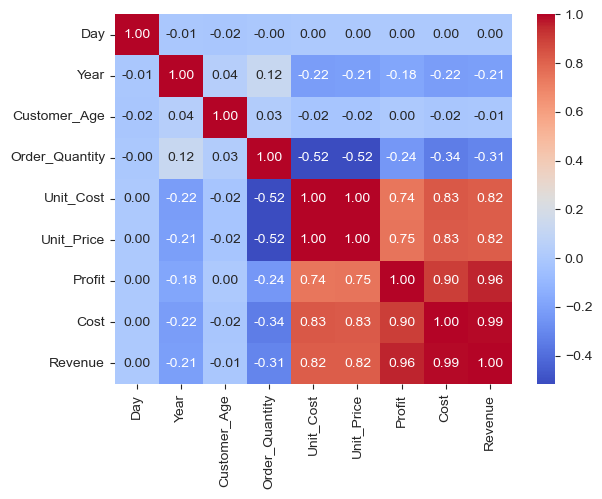

In [169]:
sns.heatmap(heatmap,annot=True,fmt=".2f",cmap="coolwarm")

In [170]:
lr=RandomForestRegressor(n_estimators=100,random_state=42)

X= df[["Cost","Unit_Cost","Unit_Price","Revenue"]]
Y=df["Profit"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
#print(X_test.shape[0])
#print(X_train.shape[0])
lr.fit(X_train,Y_train)
lr.predict(X_test)
Profit_Prediction=lr.predict(X)


In [195]:
lr.score(X_test,Y_test)

0.9987923263673764

In [171]:
df["Profit_Prediction"]=lr.predict(X)

In [162]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Prediction
0,2013-11-26,26,November,2013,19,Youth (<25),M,1,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,590.00
1,2015-11-26,26,November,2015,19,Youth (<25),M,1,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,590.00
2,2014-03-23,23,March,2014,49,Adults (35-64),M,3,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,1369.68
3,2016-03-23,23,March,2016,49,Adults (35-64),M,3,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,1080.02
4,2014-05-15,15,May,2014,47,Adults (35-64),F,3,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,238.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,2016-04-12,12,April,2016,41,Adults (35-64),M,4,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,112.00
112032,2014-04-02,2,April,2014,18,Youth (<25),M,3,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,655.31
112033,2016-04-02,2,April,2016,18,Youth (<25),M,3,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,655.31
112034,2014-03-04,4,March,2014,37,Adults (35-64),F,2,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,686.44


In [177]:
gp=df.groupby("Year")[["Cost","Profit_Prediction"]].sum().reset_index()
gp.sort_values(by="Year",inplace=True,ascending=False)
gp.reset_index(drop=True,inplace=True)
gp.head()

,Year,Cost,Profit_Prediction
0,2016,10635569,7002639.08
1,2015,12448342,7494872.42
2,2014,8221670,5818029.90
3,2013,9204895,5909985.91
4,2012,6195276,2938698.35


<Axes: xlabel='Year', ylabel='Profit_Prediction'>

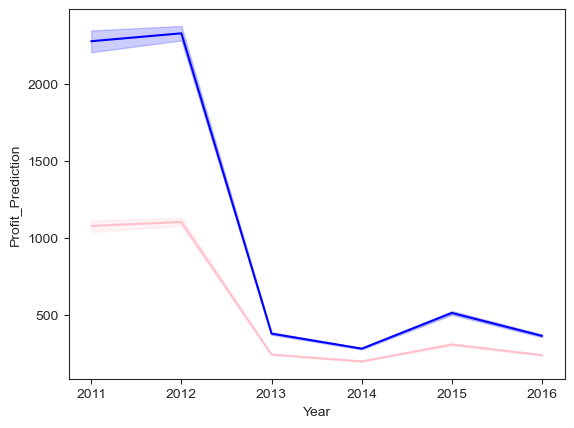

In [193]:
sns.lineplot(x=df["Year"],y=df["Profit_Prediction"],color="Pink")
sns.lineplot(x=df["Year"],y=df["Cost"],color="Blue")